<a href="https://colab.research.google.com/github/h-neal/Matt-Macarty-Algorithmic-Trading-Youtube-Series/blob/main/4_Moving_Averages_and_Rolling_Window_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using pandas rolling function**

**1. Set up environment**

In [8]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

**2. Get data from yahoo finance**

In [33]:
gld = yf.download('GLD', start='2024-01-01', end='2025-05-12')
gld.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GLD,GLD,GLD,GLD,GLD
Date,,,,,
2024-01-02,190.720001,191.889999,190.500000,191.440002,6025600
2024-01-03,189.130005,189.860001,188.160004,188.770004,8661600
2024-01-04,189.320007,189.750000,188.690002,189.080002,4416700
2024-01-05,189.350006,191.259995,189.080002,189.679993,7481200
2024-01-08,187.869995,188.740005,187.110001,187.210007,6215000


**3. Discard uneeded data**

In [34]:
gld_close = gld[['Close']].reset_index()
gld_close.head()

Price,Date,Close
Ticker,,GLD
0,2024-01-02,190.720001
1,2024-01-03,189.130005
2,2024-01-04,189.320007
3,2024-01-05,189.350006
4,2024-01-08,187.869995


**4. Use rolling method to compute moving averages**

In [35]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()
gld_close['MA_21'] = gld_close.Close.rolling(21).mean().shift()
gld_close

Price,Date,Close,MA_9,MA_21
Ticker,,GLD,,
0,2024-01-02,190.720001,NaN,NaN
1,2024-01-03,189.130005,NaN,NaN
2,2024-01-04,189.320007,NaN,NaN
3,2024-01-05,189.350006,NaN,NaN
4,2024-01-08,187.869995,NaN,NaN
...,...,...,...,...
335,2025-05-05,306.880005,304.655555,297.895239
336,2025-05-06,315.480011,304.185557,298.869524
337,2025-05-07,310.750000,305.500003,300.572382


**5. Plot data and moving averages**

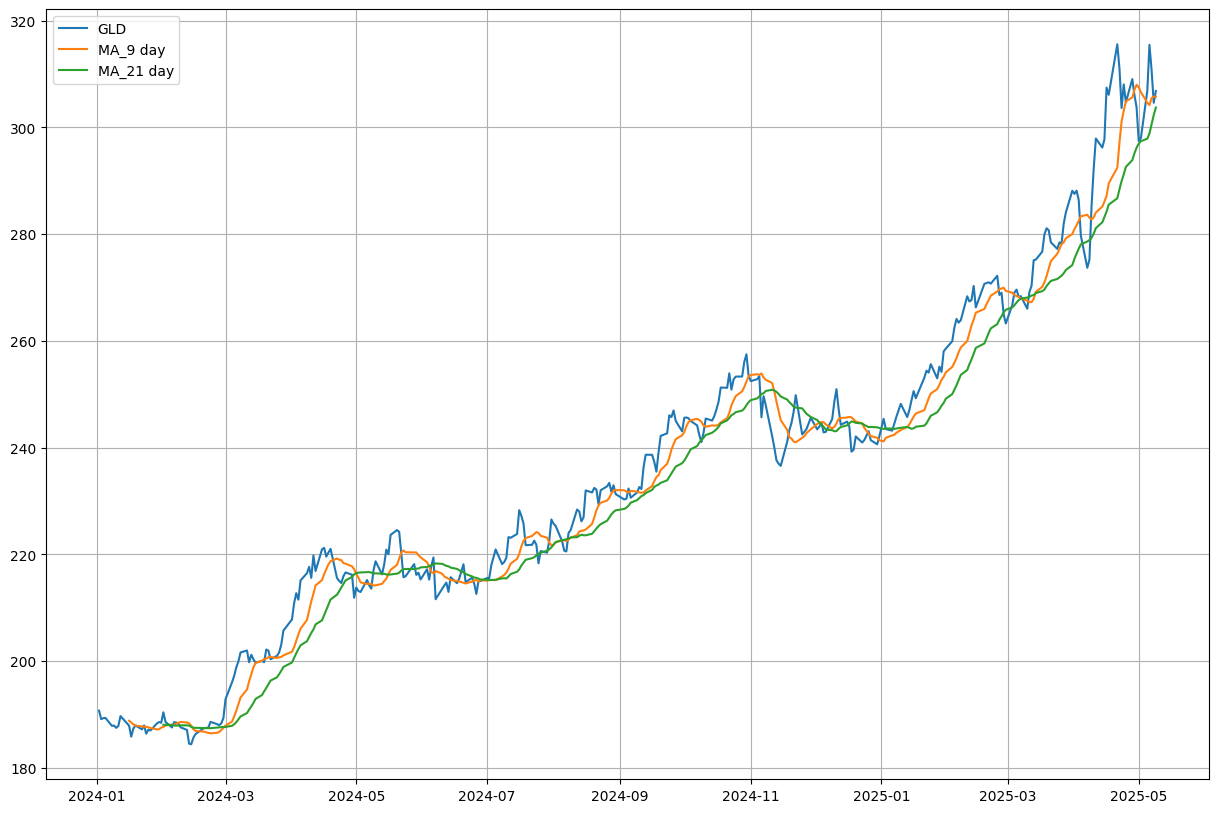

In [36]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close.Date, gld_close.Close, label='GLD')
plt.plot(gld_close.Date, gld_close.MA_9, label='MA_9 day')
plt.plot(gld_close.Date, gld_close.MA_21, label='MA_21 day')
plt.legend(loc=2)

**6. Compute log change (instantaneous rate of retrun)**

In [37]:
gld_close['log_change'] = np.log(gld_close.Close/gld_close.Close.shift())

**7. Plot reveals noisy data centered around 0**

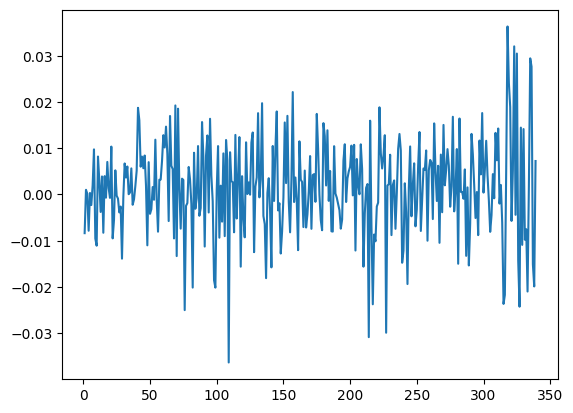

In [39]:
plt.plot(gld_close.log_change)

**8. Compute rolling historical volatility, offset using .shift() method**

In [40]:
gld_close['volatility'] = gld_close.log_change.rolling(21).std().shift()

<Axes: >

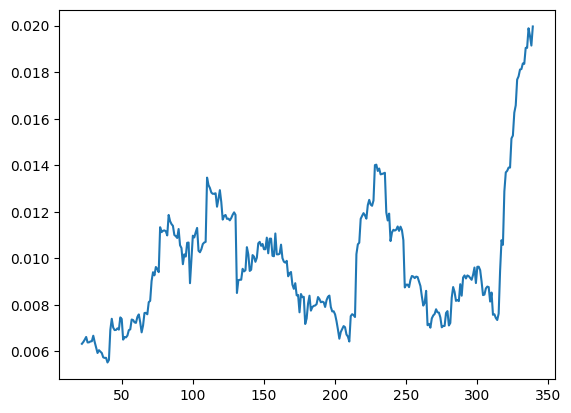

In [41]:
gld_close['volatility'].plot()